In [1]:
# Anna Ayres

# Brain Tumor Detection - KNN

### Libraries

In [2]:
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import os
import cv2
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Processing

In [3]:
#Load the brain tumor data in
tumor_folder = "brain_tumor_dataset"

tumor_images = []
pituitary_images = []
meningiomaima_images = []
giloma_images = []

tumor_labels = []
pituitary_labels = []
meningiomaima_labels = []
giloma_labels = []


for filename in os.listdir(tumor_folder):
    if filename.endswith(('.jpg')):
        try:
            if filename.startswith("Y"):
                # Resize images
                image = cv2.imread(os.path.join(tumor_folder, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)        
                image = cv2.resize(image, (224, 224)) 
                # Append 1 for yes label
                tumor_images.append(image)
                tumor_labels.append(1)
                #append for tumor type
                if filename.startswith("YPituitary"):
                    pituitary_images.append(image)
                    pituitary_labels.append(1)
                elif filename.startswith("YMeningiomaima"):
                    meningiomaima_images.append(image)
                    meningiomaima_labels.append(1)
                elif filename.startswith("YGiloma"):
                    giloma_images.append(image)
                    giloma_labels.append(1)
            else:
                # Resize images
                image = cv2.imread(os.path.join(tumor_folder, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)        
                image = cv2.resize(image, (224, 224)) 
                # Append 0 for no label
                tumor_images.append(image)
                tumor_labels.append(0)
                #append for tumor types
                pituitary_images.append(image)
                pituitary_labels.append(0)
                meningiomaima_images.append(image)
                meningiomaima_labels.append(0)
                giloma_images.append(image)
                giloma_labels.append(0)
                
        except Exception as e:
            print("Error reading image:", filename)
            print("Exception:", e)
            
#Convert lists to np array
    #All tumors
tumor_images = np.array(tumor_images)
tumor_labels = np.array(tumor_labels)
    #Tumor types
pituitary_images = np.array(pituitary_images)
meningiomaima_images = np.array(meningiomaima_images)
giloma_images = np.array(giloma_images)
pituitary_labels = np.array(pituitary_labels)
meningiomaima_labels = np.array(meningiomaima_labels)
giloma_labels = np.array(giloma_labels)

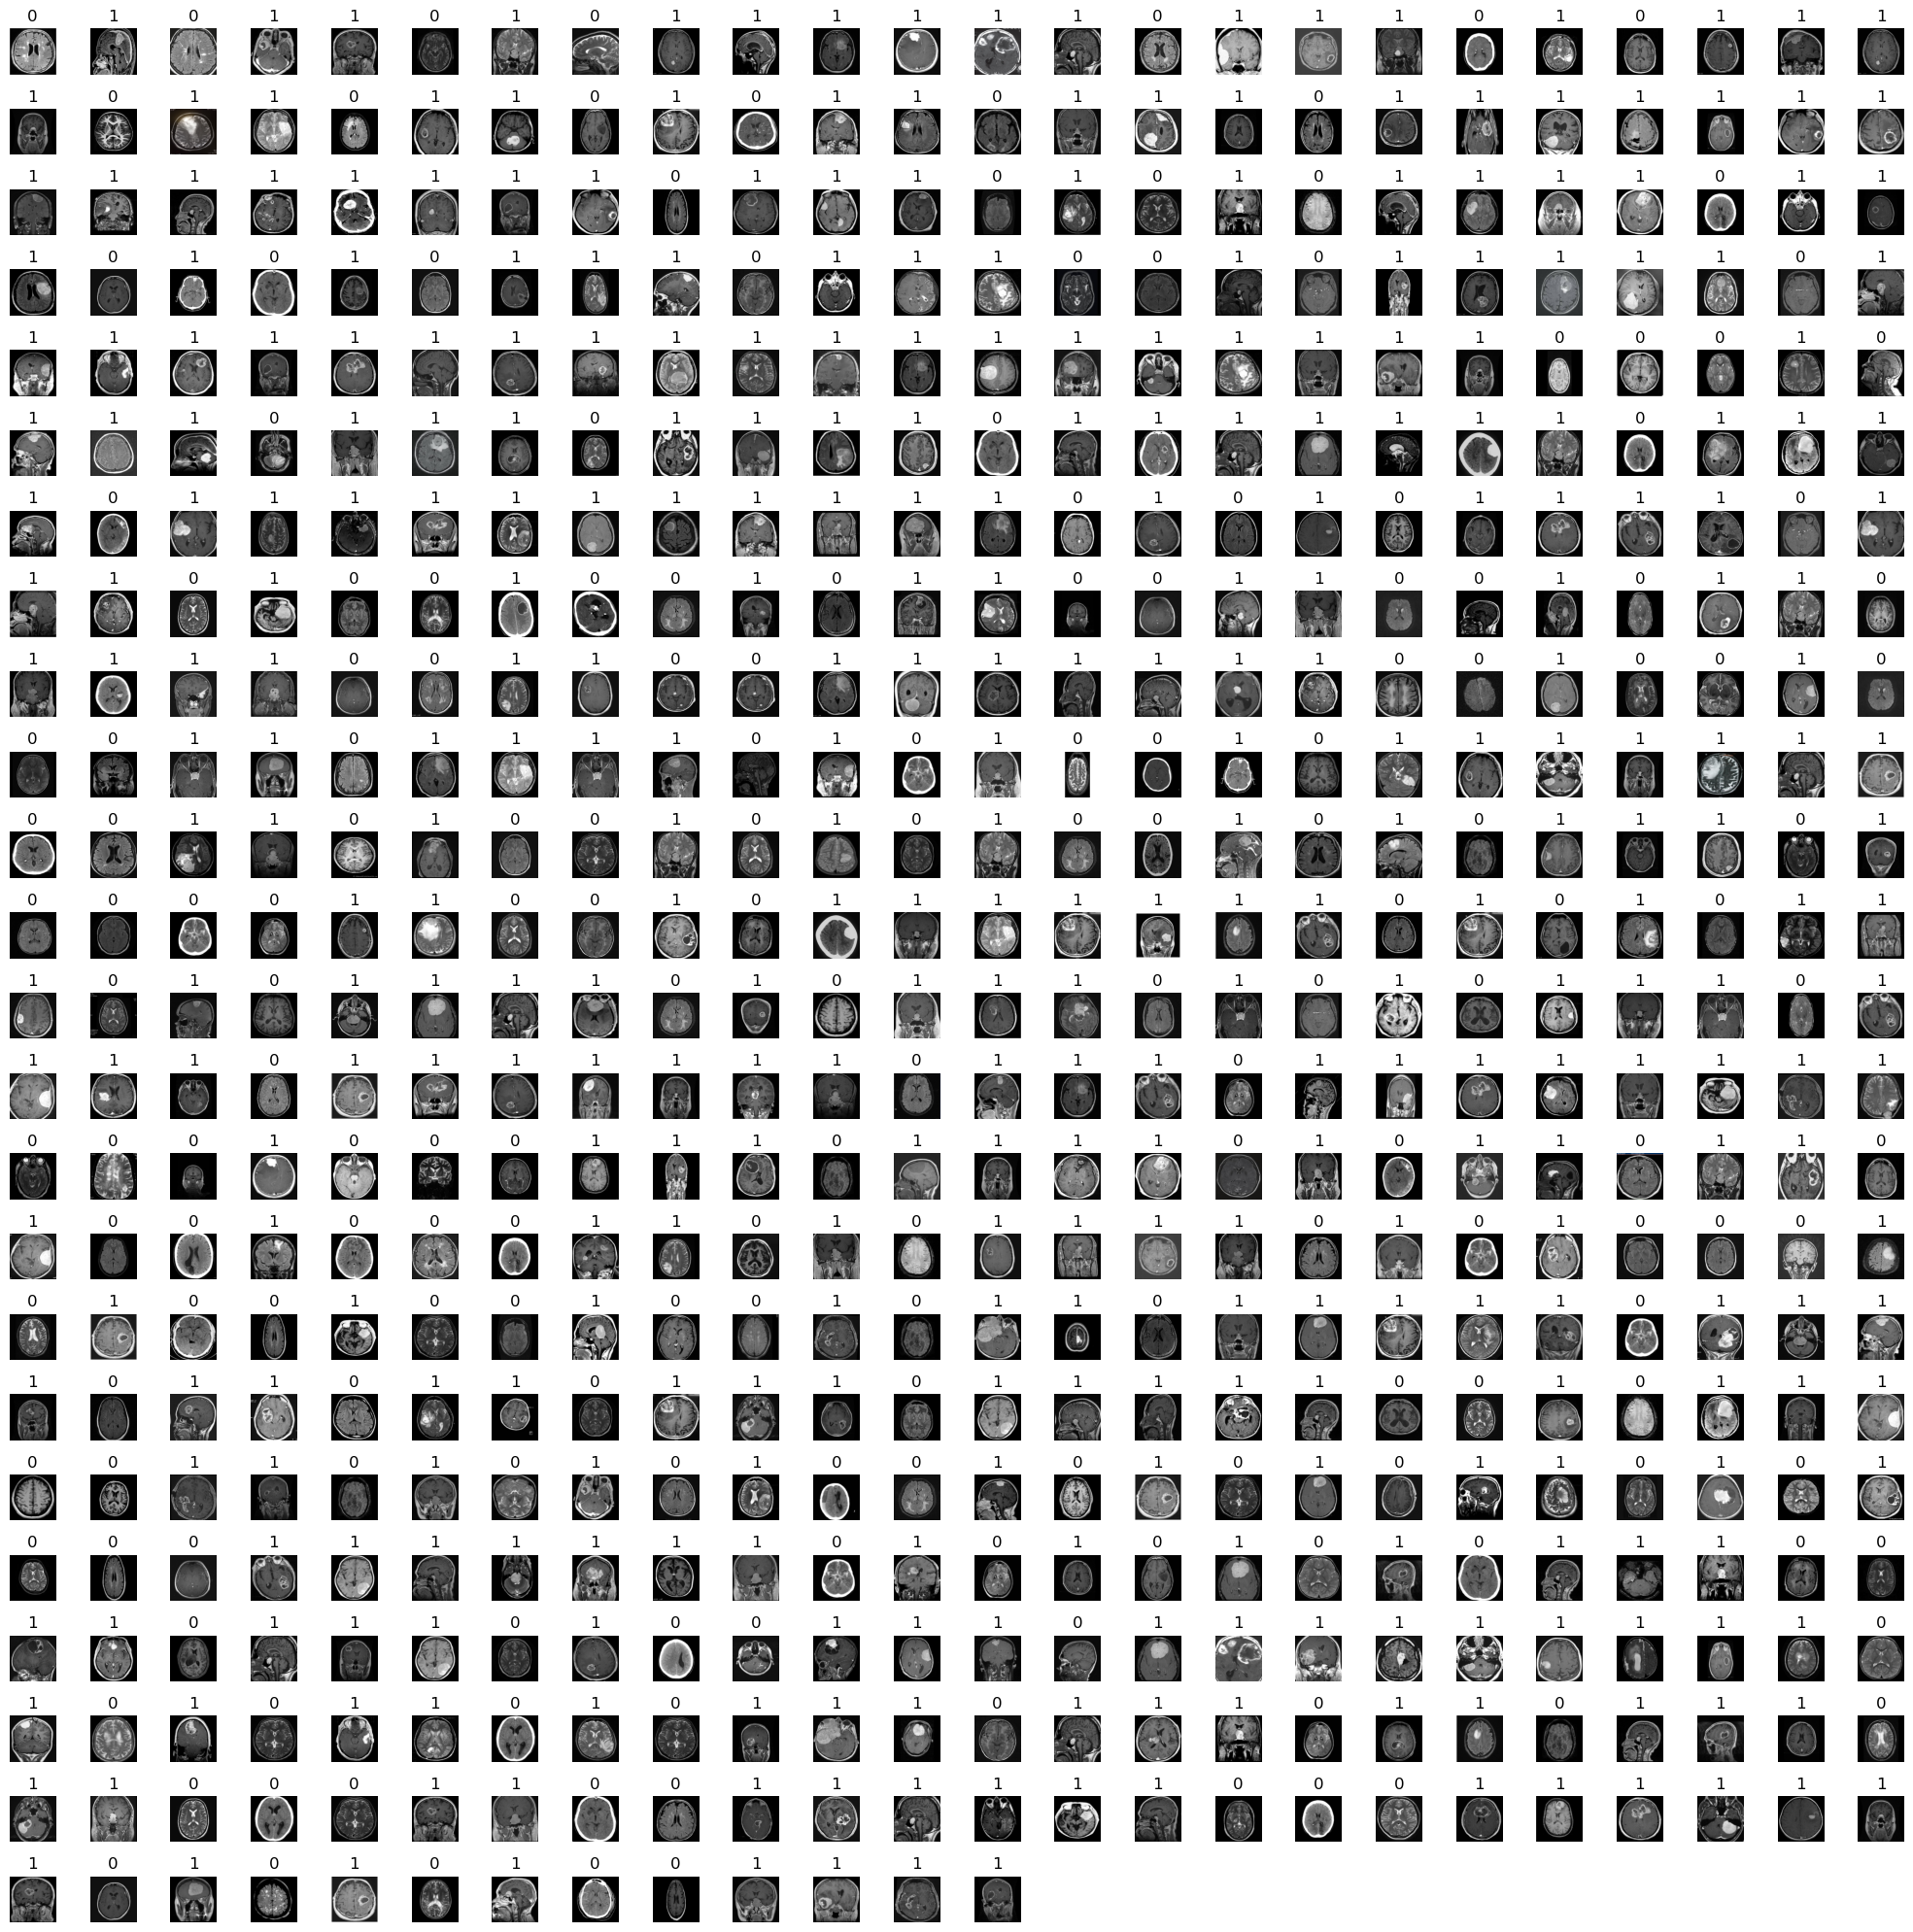

In [4]:
# Show all dataset resized images with added labels
# Adapt to data size
num_images = len(tumor_images)
num_cols = math.ceil(math.sqrt(num_images))
num_rows = math.ceil(num_images / num_cols)
# show images
plt.figure(figsize=(20,20))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(tumor_images[i], cmap='gray')
    plt.title(tumor_labels[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

### Training and Accuracy Analysis

In [5]:
# Split the data into training and testing sets - val size of 20%
def train_tumors(type_images, type_labels):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(type_images, type_labels, test_size=0.2, random_state=11)
    
    # Train the KNN model ( 5-NN )
    knn = KNeighborsClassifier(n_neighbors=5)
    X_train_flat = X_train.reshape(len(X_train), -1)
    knn.fit(X_train_flat, y_train)
    
    # Evaluate model performance
    X_test_flat = X_test.reshape(len(X_test), -1)
    accuracy = knn.score(X_test_flat, y_test) * 100
    return accuracy, knn, X_test, y_test

#Print accuracy %
print("GILOMA TUMORS: Accuracy percentage of test sample 5-nn model predictions: {:.3f}%".format(train_tumors(giloma_images, giloma_labels)[0]))
print("MENINGIOMAIMA TUMORS: Accuracy percentage of test sample 5-nn model predictions: {:.3f}%".format(train_tumors(meningiomaima_images, meningiomaima_labels)[0]))
print("PITUITARY TUMORS: Accuracy percentage of test sample 5-nn model predictions: {:.3f}%".format(train_tumors(pituitary_images, pituitary_labels)[0]))
print("\nALL TUMORS: Accuracy percentage of test sample 5-nn model predictions: {:.3f}%".format(train_tumors(tumor_images, tumor_labels)[0]))

GILOMA TUMORS: Accuracy percentage of test sample 5-nn model predictions: 75.862%
MENINGIOMAIMA TUMORS: Accuracy percentage of test sample 5-nn model predictions: 67.213%
PITUITARY TUMORS: Accuracy percentage of test sample 5-nn model predictions: 84.906%

ALL TUMORS: Accuracy percentage of test sample 5-nn model predictions: 76.106%


### Confusion Matrix

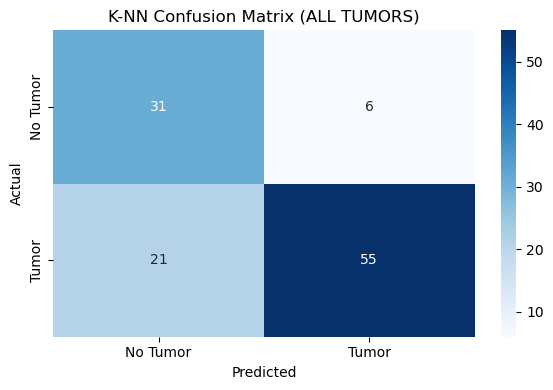

	Accuracy 76.106%


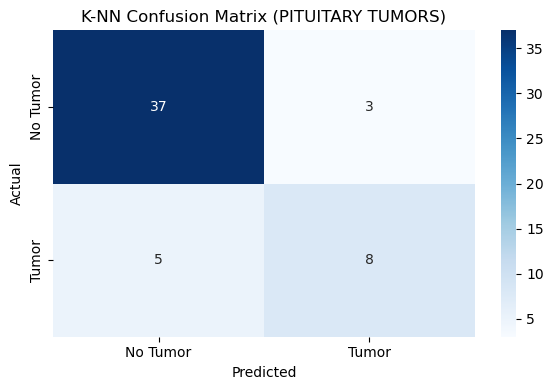

	Accuracy 84.906%


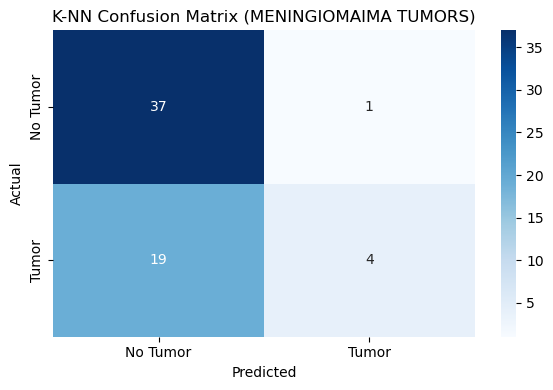

	Accuracy 67.213%


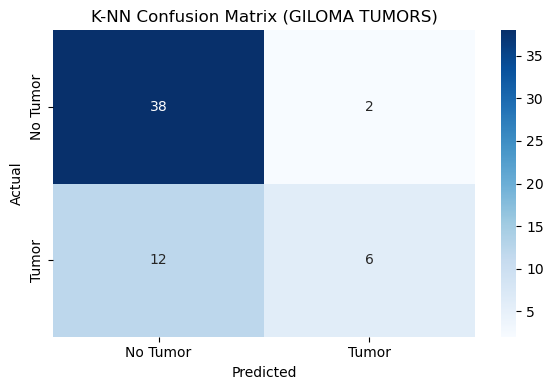

	Accuracy 75.862%


In [6]:
# Generate confusion matrix
def generate_cmatrix( name, type_images, type_labels):
    if name == "giloma":
        tumor_type = "GILOMA TUMORS"
    elif name == "meningiomaima":
        tumor_type = "MENINGIOMAIMA TUMORS"
    elif name == "pituitary":
        tumor_type = "PITUITARY TUMORS"
    else:
        tumor_type = "ALL TUMORS"
        
    acc, knn, X_test, y_test = train_tumors(type_images, type_labels)
    X_test_flat = X_test.reshape(len(X_test), -1)
    predicted = knn.predict(X_test_flat)
    confusion = confusion_matrix(y_test, predicted)
    confusion_df = pd.DataFrame(confusion, index=['No Tumor', 'Tumor'], columns=['No Tumor', 'Tumor'])

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_df, annot=True, cmap='Blues')
    plt.title("K-NN Confusion Matrix ({})".format(tumor_type))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    print("\tAccuracy {:.3f}%".format(acc))
    
generate_cmatrix('all', tumor_images, tumor_labels)
generate_cmatrix('pituitary', pituitary_images, pituitary_labels)
generate_cmatrix('meningiomaima', meningiomaima_images, meningiomaima_labels)
generate_cmatrix('giloma', giloma_images, giloma_labels)